# Setup

In [8]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# ceci est une modif pour git
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join("datasets", "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300, images_path=IMAGES_PATH):
    if not os.path.isdir(images_path):
        os.makedirs(images_path)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Récupération des données

In [9]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [10]:
fetch_housing_data()

In [11]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Examine les données *(pandas)*

In [12]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Nombres de variables dans le dataset : 10**

In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Résumé des variables**

In [14]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Histogrames** *(matplotlib)*

Saving figure attribute_histogram_plots


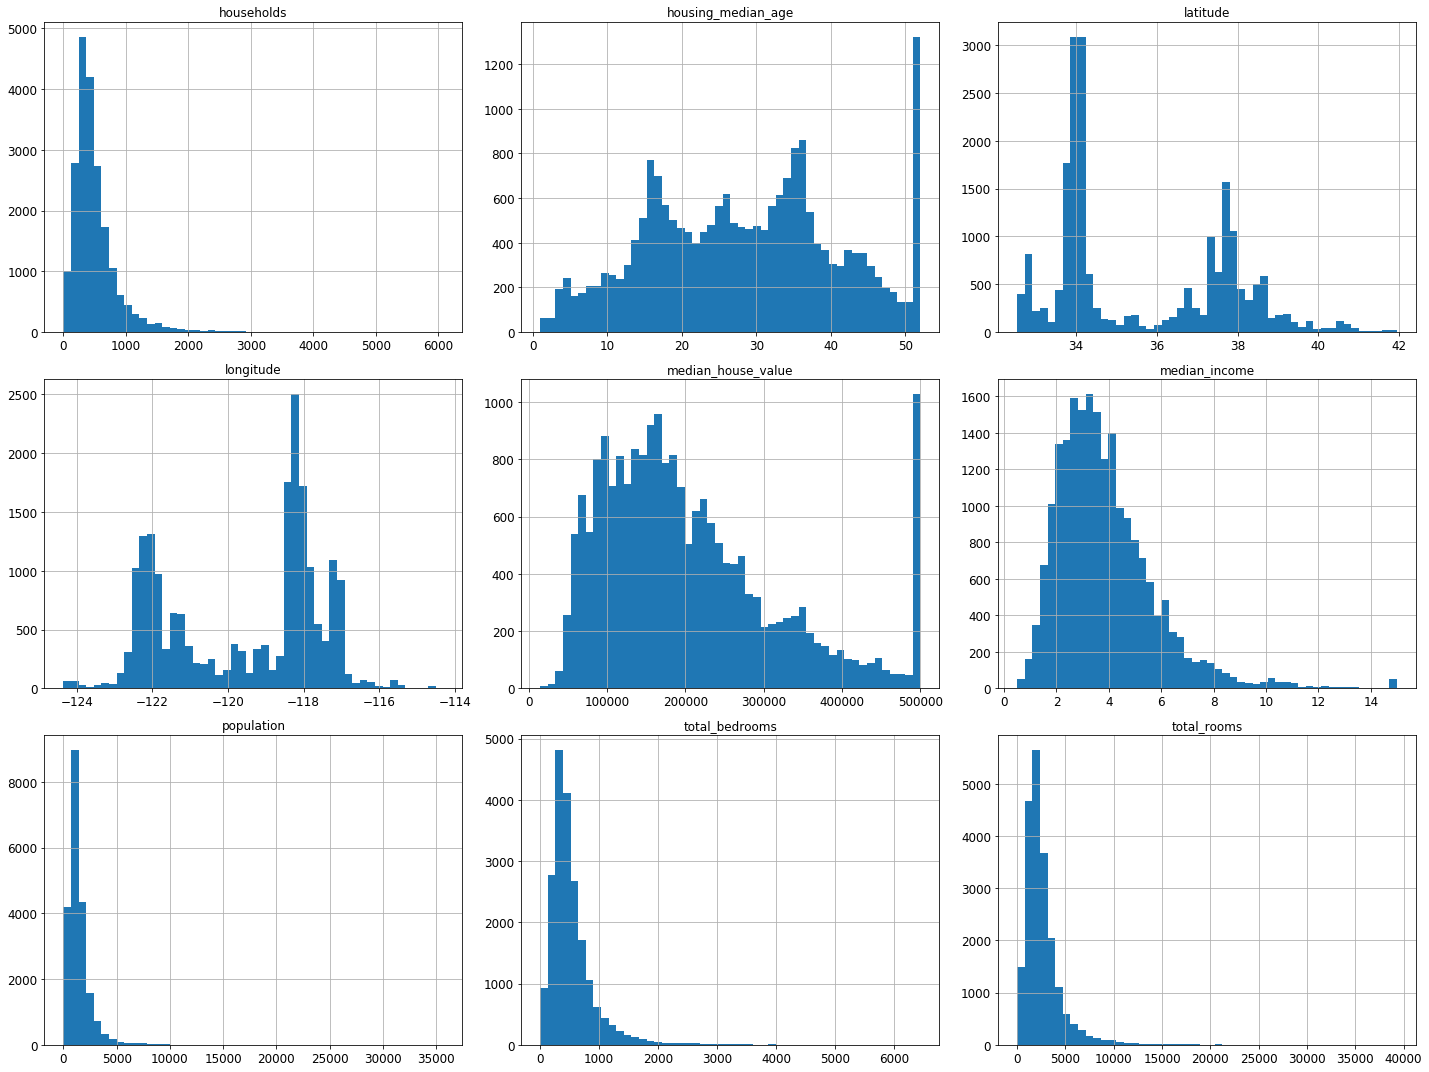

In [15]:
# Charge matplotLib avec la bonne configuration du back-end de jupiter
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show() #Facultatif

# Création du jeu de test et de validation
**Astuce:** le jeu de test est pris aléatoirement pour éviter le *biais d'espionage de données* qui engendrerai une estimation trop optimiste.

In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) # prise en compte du germe
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


**Astuce:** -pour éviter **un biais d'échantillonnage** on réalise **un échantillonage stratifié** suivant la variable: *median income*  
  -nombre de strates pas trop grand et suffisament large (=5)          

In [22]:
# Divide by 1.5 to limit the number of income categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

**Représentation des portions sur l'ensemble des données**

In [23]:
housing["income_cat"].value_counts() / len(housing["income_cat"])

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

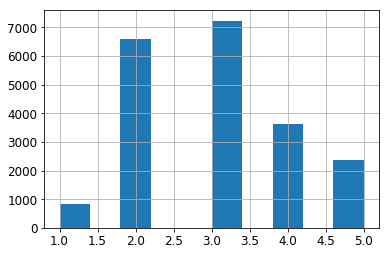

In [24]:
housing["income_cat"].hist()

**Réalisation de l'échantillonnage stratifié:**

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

**Représentation des portions sur le jeu de test stratifié**

In [26]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

**Ici:** on supprime la variable income_cat pour revenir au format de données initial

In [27]:
for set_ in (strat_train_set, strat_test_set):
    if("income_cat") in housing:
        set_.drop("income_cat", axis=1, inplace=True)

# Visualisation des données

**Vis à vis de la population**

Saving figure visualization_plot


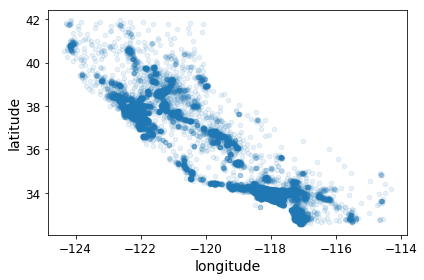

In [28]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("visualization_plot")

**Vis à vis de la population et des prix**

Saving figure housing_prices_scatterplot


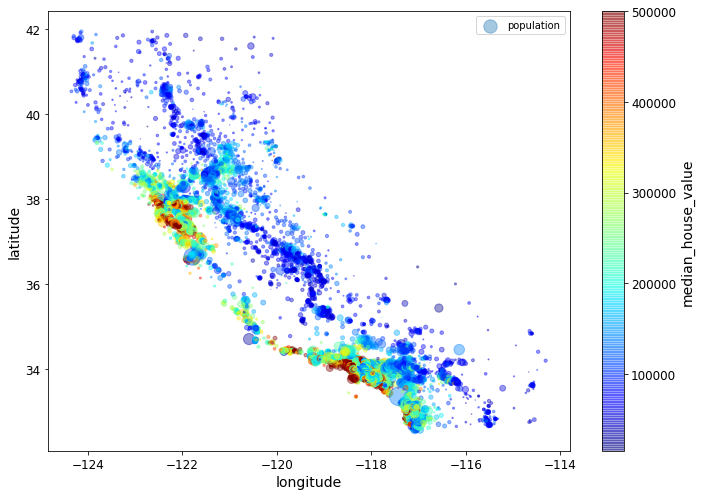

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

**Recherche de corrélations**

Matrice de coefficient de corrélation

In [30]:
corr_matrix = housing.corr()

Vecteur de coefficients de corrélation de "median house value"

In [31]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Affichage matriciel de certaines corrélations quantitatives (les plus pertinentes)

Saving figure scatter_matrix_plot


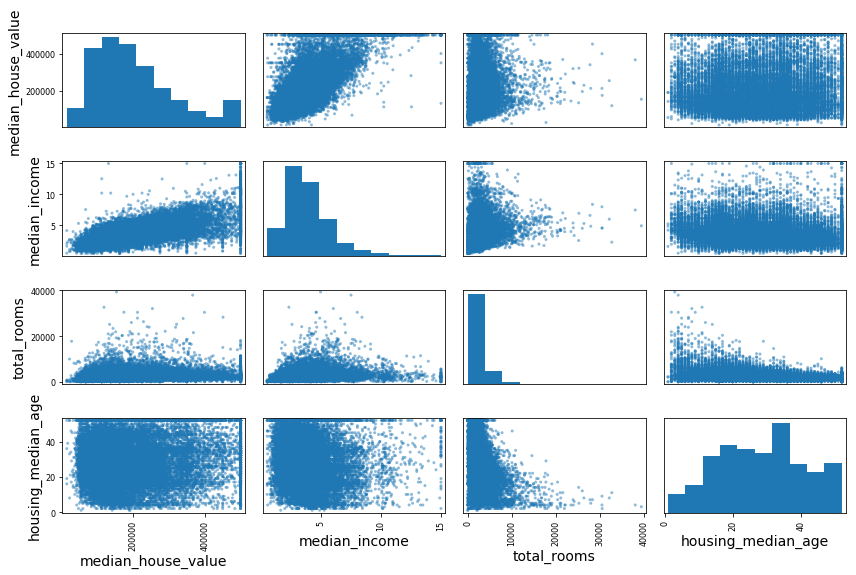

In [32]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

**Remarque:** il y a une forte corrélation entre "median_house_value" et "median_income"

# Préparation des données aux algorithmes d'apprentissage

Retour à un jeu de données propres:

In [33]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

**Nettoyage des données manquantes**

Création d'une instance de la classe imputer

In [46]:
from sklearn import impute

imputer = SimpleImputer(strategy="median")

Supprime les données non numériques

In [47]:
housing_num = housing.drop('ocean_proximity', axis=1)

Application aux données d'entrainements

In [48]:
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

Transformation du jeu d'entrainement

In [49]:
X = imputer.transform(housing_num)

Réinjection dans un dataFrame Pandas

In [50]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

Encodage des données qualitatives *avec OneHotEncoder plutôt que CategoricalEncoder (à venir dans future release)*

In [65]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [67]:
# Attention à décomenter et supprimer la definition du dessus apres update to v0.20.0 (stable)
from sklearn.preprocessing import OrdinalEncoder

cat_encoder = OrdinalEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [68]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**Ajout d'un transformateur sur mesure** : *qui ajoute deux variable*

In [69]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [70]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


**Ajout d'un Pipeline de Transformation pour les variables numériques**

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [73]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

**Ajout d'un Pipeline gérant les catégories**  
Utilisation d'un classe pour maintenir des colonnes en dataframe Pandas

In [74]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [78]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OrdinalEncoder()),
    ])

**Union des Pipelines**

In [79]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [80]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.08649871,
         0.15531753,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -0.03353391,
        -0.83628902,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.09240499,
         0.4222004 ,  4.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ..., -0.03055414,
        -0.52177644,  1.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.06150916,
        -0.30340741,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.09586294,
         0.10180567,  3.        ]])

# Selection et entrainement d'un model

**Avec une régression linéaire :**

In [81]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

*Prediction sur 5 valeurs*

In [82]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [83]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [206995.11061891 318951.22197374 205450.41727608  71346.26409049
 185872.83011256]


In [84]:
print("Expected Labels:", list(some_labels))

Expected Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


**Calcul de la RMSE**

In [85]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("error = ", lin_rmse)

error =  69422.32378905766


In [86]:
min(housing_labels)

14999.0

In [87]:
max(housing_labels)

500001.0

**Calcul de l'erreur absolu moyenne**

In [88]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

50343.60685968751

*L'erreur obtenu est trop importante !*

**Avec un model non linéaire (arbres de décision)**

In [89]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [90]:
housing_predictions = tree_reg.predict(housing_prepared)
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

0.0

**Validation croisée en 10 passes**

In [91]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [92]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [67641.77095916 70853.31655094 68829.18662421 72202.7362738
 74289.91428393 72834.45558313 72438.49241811 71195.72273041
 71930.88452171 76244.68067664]
Mean: 71846.11606220428
Standard deviation: 2344.5394467466076


*Ici les résultats sont mauvais: Overfitting! (surajustement du model)*

**Avec un autre model non linéaire: Les fôrets aléatoires** 

In [94]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [95]:
housing_predictions = forest_reg.predict(housing_prepared)
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

13779.477204457362

In [96]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51968.04705069 50220.0459021  53189.43981866 55471.99653155
 53195.84633345 55775.37753242 51440.8855834  51499.21614495
 56520.03351994 54788.11343342]
Mean: 53406.90018505781
Standard deviation: 2032.1491130472207


*On remarque que le score obtenu sur le jeu d'entrainement est très inférieur à ceux obtenus sur le jeu de validation*  
**Il y a de l'Overfitting !**  
  
**Résultat obtenu : 52564**

# Réglage avec précision du modèle

**Recherche par quadrillage:** *parcour de certaines valeurs des hyperparamètres (18 combinaisons en 5 entrainement)* 

In [98]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

**Récupère la meilleur combinaison parmis celle setter**

In [99]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

Récupère la meilleur combinaison avec tout les autres paramètres *(attention: n'est le résultat que des param donnés)*

In [100]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

**Score d'évaluation:**

In [101]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64804.85156645527 {'max_features': 2, 'n_estimators': 3}
54873.75291367747 {'max_features': 2, 'n_estimators': 10}
52121.370236026676 {'max_features': 2, 'n_estimators': 30}
61018.04180555948 {'max_features': 4, 'n_estimators': 3}
52832.999543451915 {'max_features': 4, 'n_estimators': 10}
50183.44586636331 {'max_features': 4, 'n_estimators': 30}
58837.15019233595 {'max_features': 6, 'n_estimators': 3}
52845.98328139315 {'max_features': 6, 'n_estimators': 10}
50477.04868232418 {'max_features': 6, 'n_estimators': 30}
60271.68887373567 {'max_features': 8, 'n_estimators': 3}
52561.04564470043 {'max_features': 8, 'n_estimators': 10}
50709.4502291379 {'max_features': 8, 'n_estimators': 30}
62233.51854818673 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53462.97265316055 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60547.2565229496 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52265.82386507666 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

**On remarque que le résultat est meilleur: 49694 {u'max_features': 8, u'n_estimators': 30} avec ce réglage des hyperparamêtre qu'avec les valeurs par défault: 52564**

*Affichage du pandas frame result:*

In [102]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.056849,0.001093,0.002793,3.987792e-04,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.052504e+09,-4.318466e+09,...,-4.199669e+09,1.664004e+08,18,-1.130950e+09,-1.110893e+09,-1.082455e+09,-1.158961e+09,-1.132885e+09,-1.123229e+09,2.547280e+07
1,0.188156,0.009298,0.009386,2.347572e-03,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.943046e+09,-3.041053e+09,...,-3.011129e+09,8.799690e+07,11,-5.712455e+08,-5.361226e+08,-5.455879e+08,-5.725326e+08,-5.720064e+08,-5.594990e+08,1.551944e+07
2,0.548037,0.016405,0.023592,4.824684e-04,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.593817e+09,-2.776761e+09,...,-2.716637e+09,1.170354e+08,5,-4.170990e+08,-4.048386e+08,-4.115671e+08,-4.280044e+08,-4.211346e+08,-4.165287e+08,7.931050e+06
3,0.093587,0.001237,0.002992,2.861023e-07,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.669109e+09,-3.859505e+09,...,-3.723201e+09,8.923954e+07,16,-9.927232e+08,-9.818246e+08,-1.000812e+09,-1.030467e+09,-1.004146e+09,-1.001994e+09,1.618313e+07
4,0.339499,0.013579,0.008187,3.972261e-04,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.754882e+09,-2.879846e+09,...,-2.791326e+09,1.025194e+08,8,-5.113542e+08,-5.115723e+08,-5.019154e+08,-5.418124e+08,-5.334581e+08,-5.200225e+08,1.503148e+07
5,0.994898,0.037216,0.027727,8.087025e-03,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.412540e+09,-2.520897e+09,...,-2.518378e+09,1.093930e+08,1,-3.813564e+08,-3.780162e+08,-3.823066e+08,-4.019468e+08,-3.927007e+08,-3.872653e+08,8.833344e+06
6,0.132054,0.001351,0.003790,2.129129e-03,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.258985e+09,-3.615952e+09,...,-3.461810e+09,1.644147e+08,12,-9.529243e+08,-8.660689e+08,-8.866330e+08,-9.496710e+08,-9.458340e+08,-9.202262e+08,3.647858e+07
7,0.444544,0.019751,0.008178,3.989699e-04,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.703451e+09,-2.849934e+09,...,-2.792698e+09,1.122469e+08,9,-5.209949e+08,-4.817275e+08,-4.946095e+08,-5.139914e+08,-5.069682e+08,-5.036583e+08,1.400804e+07
8,1.319443,0.041638,0.023539,4.849668e-04,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.383998e+09,-2.576055e+09,...,-2.547932e+09,1.323466e+08,2,-3.876492e+08,-3.762758e+08,-3.859509e+08,-3.933517e+08,-3.864214e+08,-3.859298e+08,5.504244e+06
9,0.176145,0.008007,0.002992,5.761645e-07,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.402965e+09,-3.802253e+09,...,-3.632676e+09,1.553392e+08,14,-9.499404e+08,-9.704887e+08,-9.075106e+08,-9.446969e+08,-8.922375e+08,-9.329748e+08,2.877668e+07


**Recharche aléatoire suivant une range** *(10 itérations de combinaisons en 5 entrainement)*

In [103]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026E0507EB00>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026E0507E908>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [104]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49755.04219550498 {'max_features': 7, 'n_estimators': 180}
51792.270456858154 {'max_features': 5, 'n_estimators': 15}
49936.37289626746 {'max_features': 3, 'n_estimators': 72}
51182.54956175916 {'max_features': 5, 'n_estimators': 21}
49821.81859161876 {'max_features': 7, 'n_estimators': 122}
49944.625989157 {'max_features': 3, 'n_estimators': 75}
49899.86254455777 {'max_features': 3, 'n_estimators': 88}
49504.29629389911 {'max_features': 5, 'n_estimators': 100}
49654.176104934886 {'max_features': 3, 'n_estimators': 150}
65373.28992176689 {'max_features': 5, 'n_estimators': 2}


*on vient ici de trouver un meilleur estimateur mais couteux : 49147.1524172 {u'max_features': 7, u'n_estimators': 180}*

**Affichage de l'importance des variables**

In [105]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.09454507, 0.09514775, 0.04965507, 0.0197246 , 0.01746055,
       0.01971088, 0.01876166, 0.34089819, 0.06557321, 0.11101343,
       0.0927256 , 0.074784  ])

In [106]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3408981860711069, 'median_income'),
 (0.11101343311705239, 'pop_per_hhold'),
 (0.0951477507161698, 'latitude'),
 (0.09454506900258544, 'longitude'),
 (0.0927255966070505, 'bedrooms_per_room'),
 (0.07478400188500925, '<1H OCEAN'),
 (0.06557321173749896, 'rooms_per_hhold'),
 (0.04965506808220564, 'housing_median_age'),
 (0.019724595270749774, 'total_rooms'),
 (0.019710875490921743, 'population'),
 (0.01876165784982885, 'households'),
 (0.017460554169820793, 'total_bedrooms')]

# Evaluation sur le jeu de test

In [107]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48191.94476879535

**Nous obtenons sur le jeu de test une erreur moyenne de prédiction de 47k**